<a href="https://colab.research.google.com/github/alexis-anciado/moop/blob/main/Pi_thons_Final_Activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")

In [6]:
dataset = pd.read_csv('/content/drive/MyDrive/DRAFT - VS.csv')

In [8]:
dataset.shape

(196, 17)

In [9]:
dataset.head(196)

,Year Level,"Address (Municipality/City, Province)",Number of Units for the 1st Semester of AY 2023-2024:,SEX,Are you staying in a Dormitory/Apartment this A.Y.?,I am comfortable living with other people.,I prefer studying with friends.,I prefer studying in a quiet environment.,I am more comfortable around my family than I am with\npeers,"From your apartment/dormitory (for apartment/dorm renters) or your home (for commuters) to school, how long is your estimated time of travel?","If you were to commute, how often does traffic occur?",What is your estimated monthly allowance?,What is the estimated monthly income of your family?,"On average, what is the total number of hours for your free time in a day?",How early is your first class?,How late does your last class end?,What’s the major contributor/s to the reason you decided to rent an apartment/dormitory?
0,1,Imus,40,Male,Yes,5,3,5,5,1,Often,3,5,2,700,1700,4
1,3,Imus,40,Male,Yes,4,4,4,4,1,Sometimes,4,5,3,700,1700,6
2,3,General Trias,30,Male,Yes,5,4,4,1,4,Often,7,5,4,700,1900,14
3,3,Noveleta,40,Male,Yes,4,5,5,2,5,Often,5,4,2,700,1700,6
4,3,Silang,40,Female,Yes,4,4,5,5,1,Sometimes,6,5,3,700,1700,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,4,General Trias,40,Male,No,3,4,5,2,2,Sometimes,5,5,3,700,1900,6
192,4,Indang,40,Male,No,4,1,5,5,1,Often,4,4,3,700,1900,5
193,4,Naic,40,Male,No,2,3,5,2,2,Sometimes,5,5,3,700,1900,21
194,4,Naic,40,Male,No,4,4,3,3,1,Sometimes,5,5,2,700,1700,20


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 17 columns):
 #   Column                                                                                                                                         Non-Null Count  Dtype 
---  ------                                                                                                                                         --------------  ----- 
 0   Year Level                                                                                                                                     196 non-null    int64 
 1   Address (Municipality/City, Province)                                                                                                          196 non-null    object
 2   Number of Units for the 1st Semester of AY 2023-2024:                                                                                          196 non-null    int64 
 3   SEX                                

In [11]:
dataset.describe()

,Year Level,Number of Units for the 1st Semester of AY 2023-2024:,I am comfortable living with other people.,I prefer studying with friends.,I prefer studying in a quiet environment.,I am more comfortable around my family than I am with\npeers,"From your apartment/dormitory (for apartment/dorm renters) or your home (for commuters) to school, how long is your estimated time of travel?",What is your estimated monthly allowance?,What is the estimated monthly income of your family?,"On average, what is the total number of hours for your free time in a day?",How early is your first class?,How late does your last class end?,What’s the major contributor/s to the reason you decided to rent an apartment/dormitory?
count,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000,196.000000
mean,2.500000,37.704082,3.571429,3.520408,4.362245,3.403061,1.908163,4.969388,3.908163,2.882653,703.061224,1792.857143,8.030612
std,1.120897,6.818841,1.022817,1.009997,0.826735,1.107453,1.245190,1.410249,1.366911,0.895290,26.618219,122.579121,6.106666
min,1.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,700.000000,1200.000000,1.000000
25%,1.750000,40.000000,3.000000,3.000000,4.000000,3.000000,1.000000,4.000000,3.000000,2.000000,700.000000,1700.000000,4.000000
50%,2.500000,40.000000,4.000000,4.000000,5.000000,3.000000,1.000000,5.000000,4.500000,3.000000,700.000000,1850.000000,6.000000
75%,3.250000,40.000000,4.000000,4.000000,5.000000,4.000000,3.000000,6.000000,5.000000,3.000000,700.000000,1900.000000,12.000000
max,4.000000,40.000000,5.000000,5.000000,5.000000,5.000000,5.000000,7.000000,5.000000,5.000000,1000.000000,2000.000000,22.000000


In [16]:
dataset['Are you staying in a Dormitory/Apartment this A.Y.?'].value_counts()

No     106
Yes     90
Name: Are you staying in a Dormitory/Apartment this A.Y.?, dtype: int64

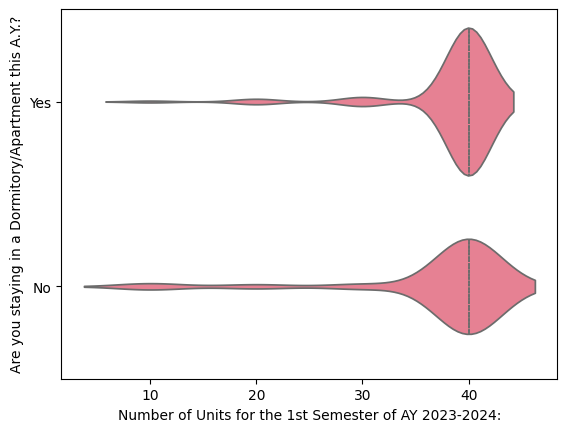

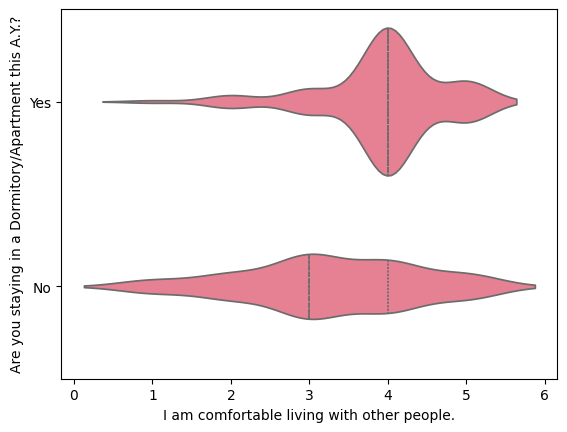

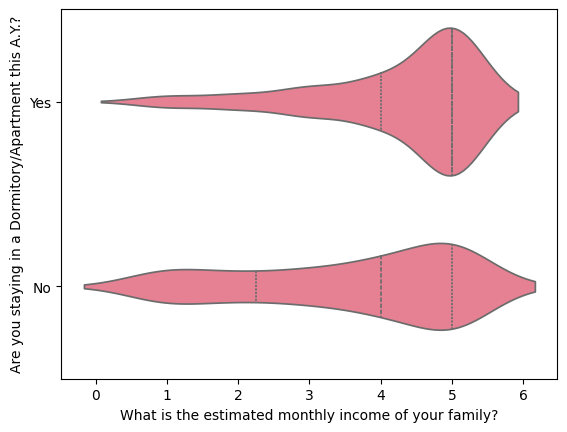

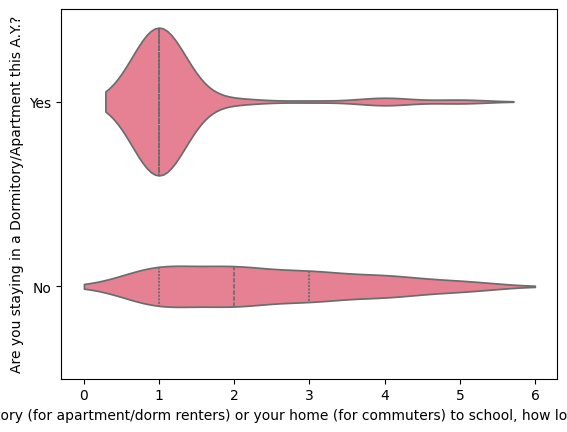

In [17]:
sns.violinplot(y='Are you staying in a Dormitory/Apartment this A.Y.?', x='Number of Units for the 1st Semester of AY 2023-2024:', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='Are you staying in a Dormitory/Apartment this A.Y.?', x='I am comfortable living with other people.', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='Are you staying in a Dormitory/Apartment this A.Y.?', x='What is the estimated monthly income of your family?', data=dataset, inner='quartile')
plt.show()
sns.violinplot(y='Are you staying in a Dormitory/Apartment this A.Y.?', x='From your apartment/dormitory (for apartment/dorm renters) or your home (for commuters) to school, how long is your estimated time of travel?', data=dataset, inner='quartile')
plt.show()

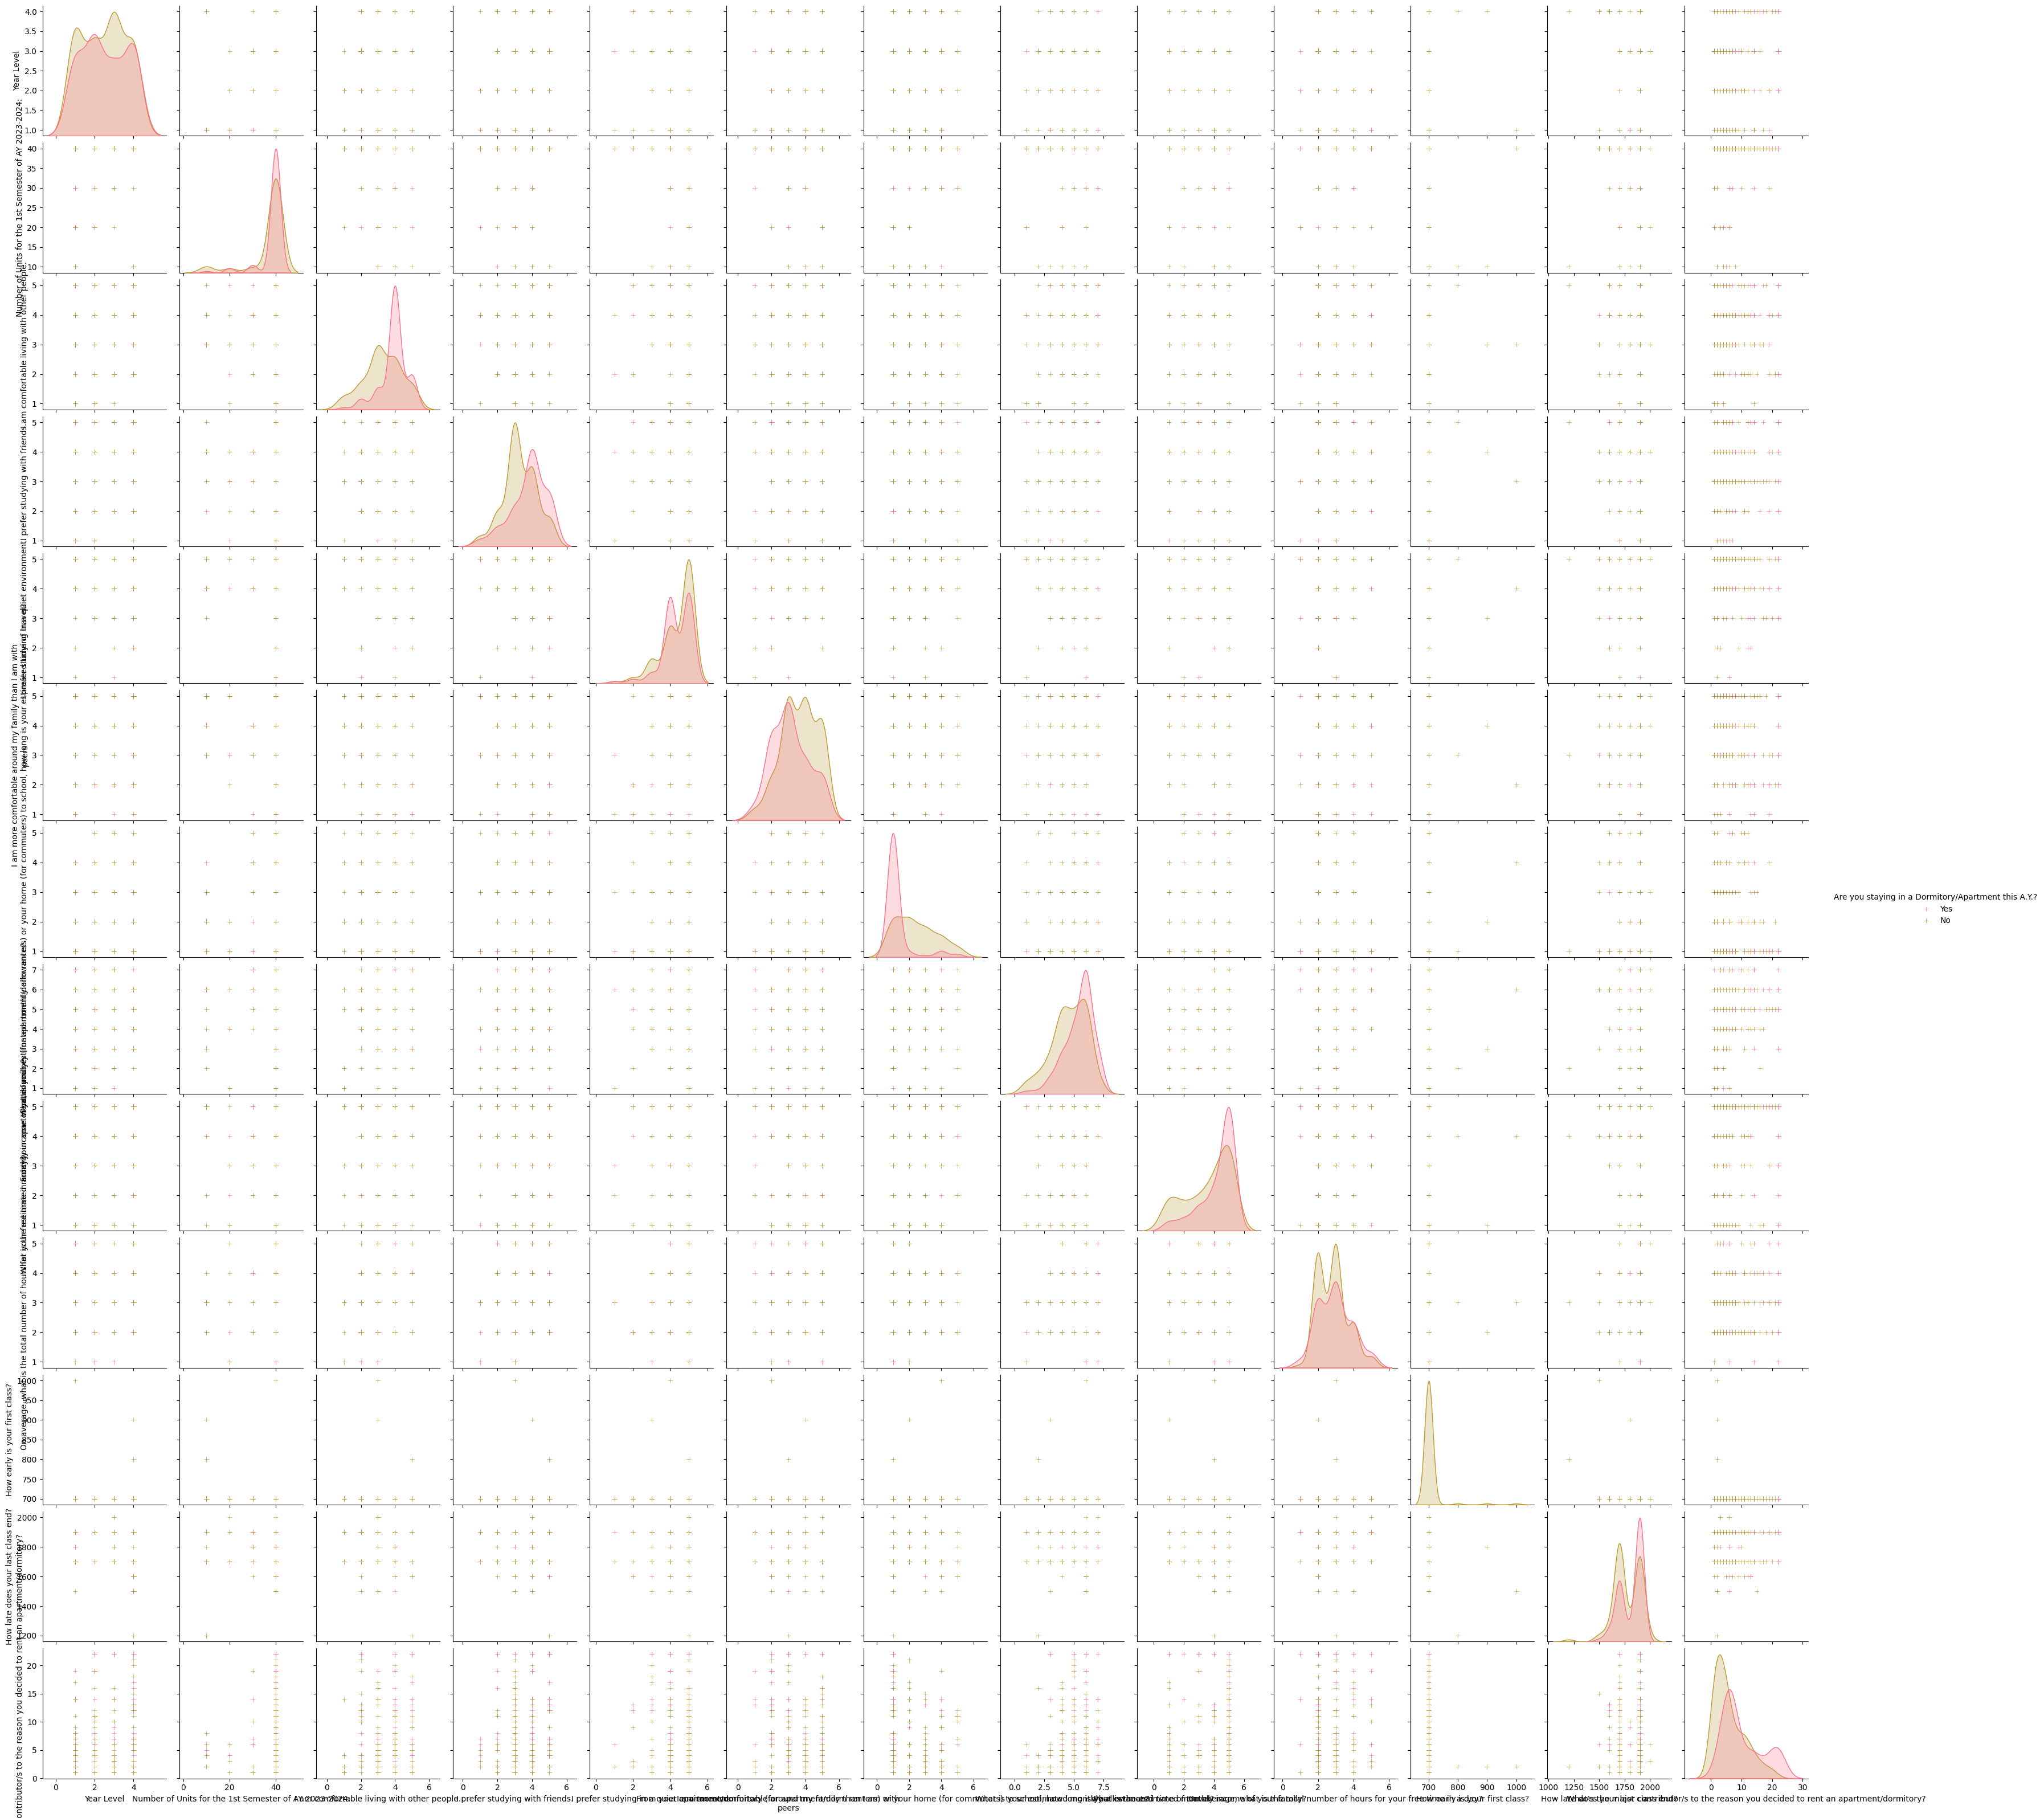

In [18]:
sns.pairplot(dataset, hue='Are you staying in a Dormitory/Apartment this A.Y.?', markers='+')
plt.show()

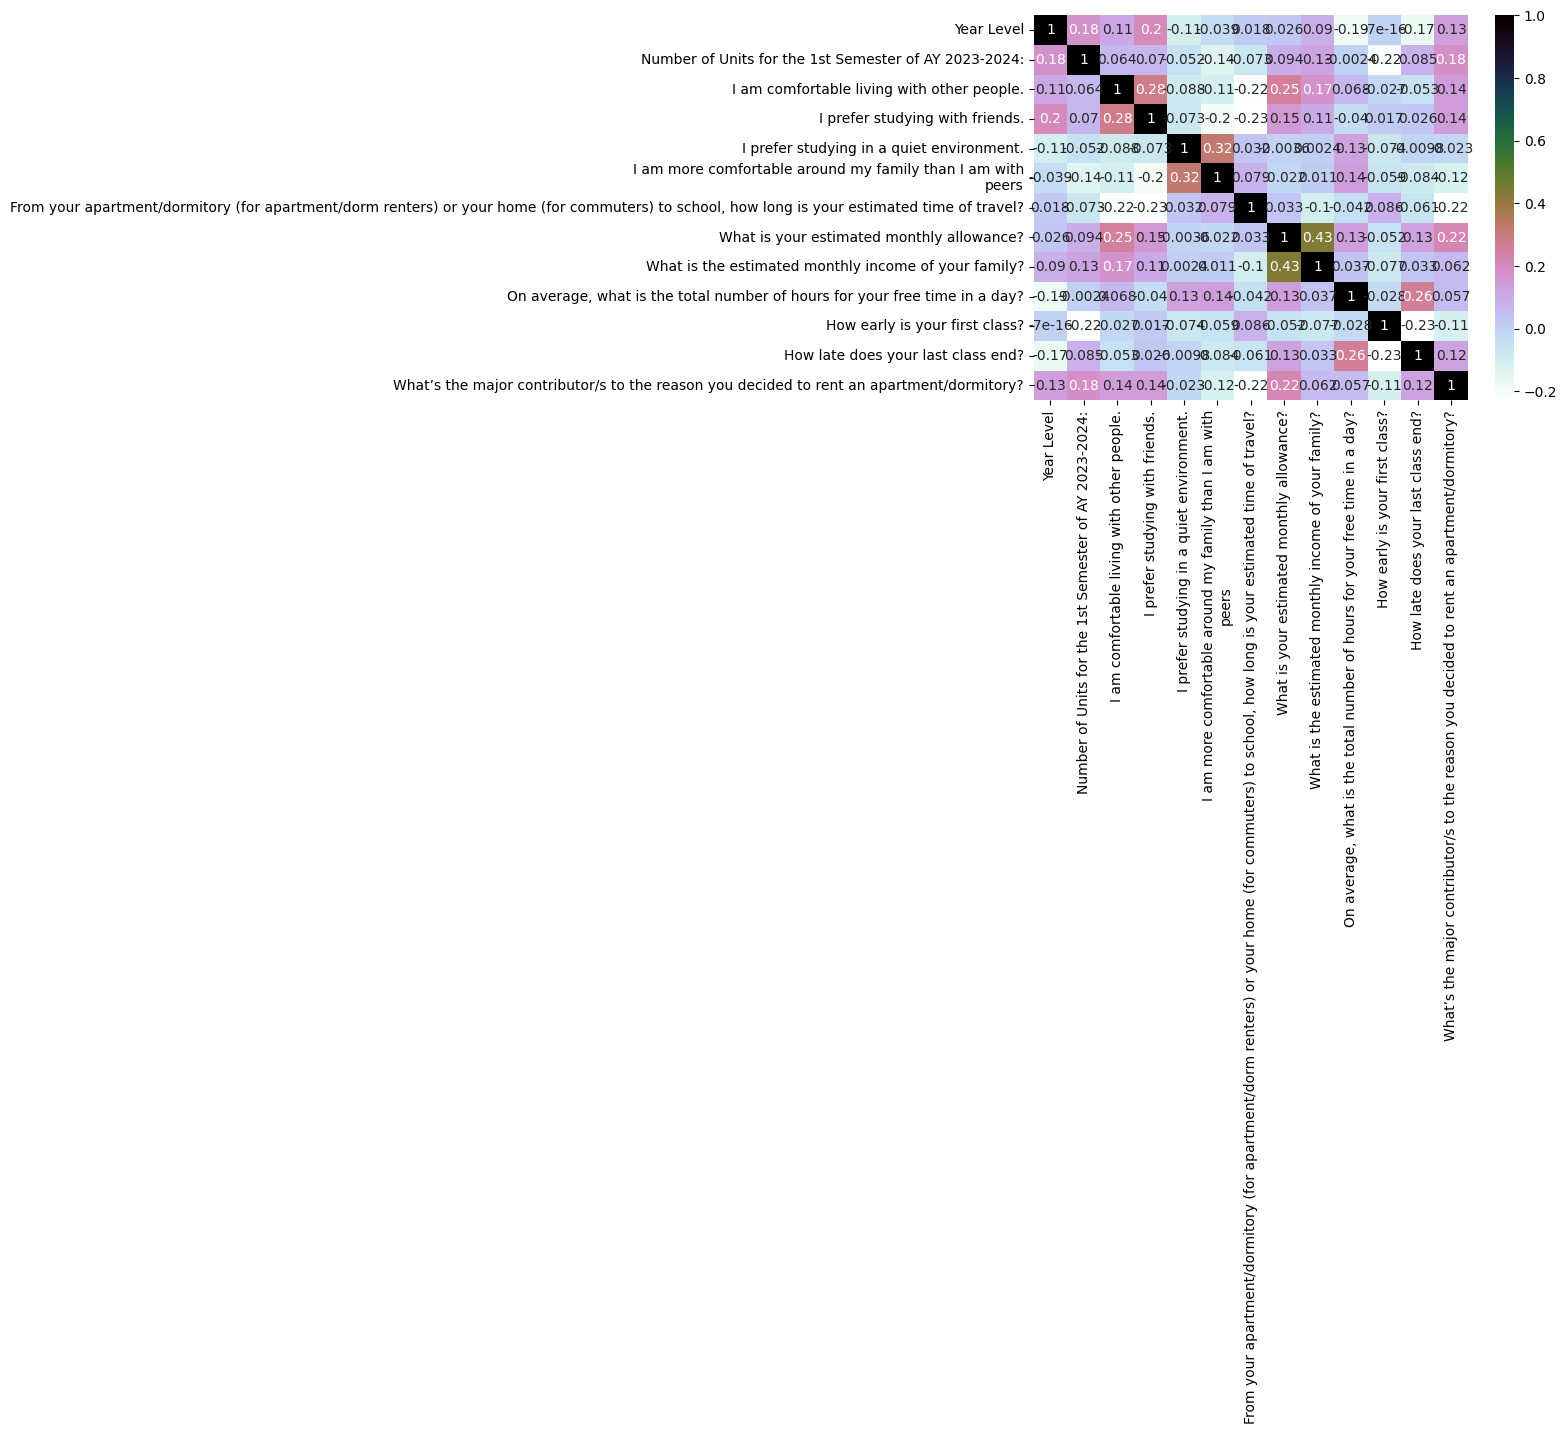

In [21]:
plt.figure(figsize=(7,5))
sns.heatmap(dataset.corr(), annot=True, cmap='cubehelix_r')
plt.show()

In [31]:
dataset['Are you staying in a Dormitory/Apartment this A.Y.?'].unique()

array(['Yes', 'No'], dtype=object)

In [33]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

dataset['Staying in Dorm or Not'] = LE.fit_transform(dataset['Are you staying in a Dormitory/Apartment this A.Y.?'])
dataset.head(20)

,Year Level,"Address (Municipality/City, Province)",Number of Units for the 1st Semester of AY 2023-2024:,SEX,Are you staying in a Dormitory/Apartment this A.Y.?,I am comfortable living with other people.,I prefer studying with friends.,I prefer studying in a quiet environment.,I am more comfortable around my family than I am with\npeers,"From your apartment/dormitory (for apartment/dorm renters) or your home (for commuters) to school, how long is your estimated time of travel?","If you were to commute, how often does traffic occur?",What is your estimated monthly allowance?,What is the estimated monthly income of your family?,"On average, what is the total number of hours for your free time in a day?",How early is your first class?,How late does your last class end?,What’s the major contributor/s to the reason you decided to rent an apartment/dormitory?,Staying in Dorm or Not
0,1,Imus,40,Male,Yes,5,3,5,5,1,Often,3,5,2,700,1700,4,1
1,3,Imus,40,Male,Yes,4,4,4,4,1,Sometimes,4,5,3,700,1700,6,1
2,3,General Trias,30,Male,Yes,5,4,4,1,4,Often,7,5,4,700,1900,14,1
3,3,Noveleta,40,Male,Yes,4,5,5,2,5,Often,5,4,2,700,1700,6,1
4,3,Silang,40,Female,Yes,4,4,5,5,1,Sometimes,6,5,3,700,1700,7,1
5,3,Silang,40,Male,Yes,4,5,4,3,1,Sometimes,6,3,2,700,1700,22,1
6,1,Kawit,40,Male,Yes,4,1,5,5,1,Often,3,1,2,700,1700,4,1
7,3,Carmona,40,Male,Yes,4,4,5,2,1,Rarely,3,2,2,700,1900,14,1
8,4,General Trias,40,Female,Yes,4,5,5,3,4,Often,5,4,3,700,1700,12,1
9,4,Imus,40,Male,Yes,3,4,4,3,1,Sometimes,5,5,2,700,1700,6,1


In [36]:
dataset_final = dataset.drop(['Address (Municipality/City, Province)', 'SEX', 'If you were to commute, how often does traffic occur?','Are you staying in a Dormitory/Apartment this A.Y.?'],axis=1)
dataset_final

,Year Level,Number of Units for the 1st Semester of AY 2023-2024:,I am comfortable living with other people.,I prefer studying with friends.,I prefer studying in a quiet environment.,I am more comfortable around my family than I am with\npeers,"From your apartment/dormitory (for apartment/dorm renters) or your home (for commuters) to school, how long is your estimated time of travel?",What is your estimated monthly allowance?,What is the estimated monthly income of your family?,"On average, what is the total number of hours for your free time in a day?",How early is your first class?,How late does your last class end?,What’s the major contributor/s to the reason you decided to rent an apartment/dormitory?,Staying in Dorm or Not
0,1,40,5,3,5,5,1,3,5,2,700,1700,4,1
1,3,40,4,4,4,4,1,4,5,3,700,1700,6,1
2,3,30,5,4,4,1,4,7,5,4,700,1900,14,1
3,3,40,4,5,5,2,5,5,4,2,700,1700,6,1
4,3,40,4,4,5,5,1,6,5,3,700,1700,7,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,4,40,3,4,5,2,2,5,5,3,700,1900,6,0
192,4,40,4,1,5,5,1,4,4,3,700,1900,5,0
193,4,40,2,3,5,2,2,5,5,3,700,1900,21,0
194,4,40,4,4,3,3,1,5,5,2,700,1700,20,0


In [39]:
X = dataset_final.drop(['Staying in Dorm or Not'], axis=1)
y = dataset_final['Staying in Dorm or Not']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (196, 13) | y shape: (196,) 


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [41]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))
# evaluate each model in turn
results = []
model_names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=4, random_state=1, shuffle=True)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy', error_score='raise')
  results.append(cv_results)
  model_names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.773529 (0.076527)
LDA: 0.722689 (0.135402)
KNN: 0.642857 (0.095905)
CART: 0.759454 (0.028709)
NB: 0.496429 (0.021698)
SVC: 0.744748 (0.075125)


In [42]:
model = SVC(gamma='auto')
model.fit(X_train, y_train)
prediction = model.predict(X_test)

In [43]:
print(f'Test Accuracy: {accuracy_score(y_test, prediction)}')
print(f'Classification Report: \n {classification_report(y_test, prediction)}')

Test Accuracy: 0.7966101694915254
Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.91      0.83        32
           1       0.86      0.67      0.75        27

    accuracy                           0.80        59
   macro avg       0.81      0.79      0.79        59
weighted avg       0.81      0.80      0.79        59

